## Import required libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
training_data = pd.read_csv("data/train.csv")

In [3]:
testing_data = pd.read_csv("data/test_without_truth.csv")

## Analysing Training Data

In [4]:
training_data.describe()

,post_id,user_id,country,#views,#comments,#likes
count,369920.000000,369920.000000,369920.000000,3.698850e+05,3.593090e+05,3.699200e+05
mean,264102.305696,21056.832826,6.700938,5.001114e+05,2.003481e+03,2.310587e+04
std,152590.609962,12101.006391,4.424512,1.623025e+06,1.209824e+04,8.616847e+04
min,0.000000,0.000000,0.000000,6.113000e+03,0.000000e+00,1.000000e+00
25%,131912.750000,10552.000000,3.000000,6.136600e+04,2.110000e+02,2.641000e+03
50%,264087.000000,21224.000000,6.000000,1.571650e+05,5.730000e+02,7.012000e+03
75%,396315.250000,31537.000000,11.000000,4.239210e+05,1.523000e+03,1.928500e+04
max,528460.000000,41773.000000,14.000000,1.779872e+08,1.219455e+06,6.197312e+06


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369920 entries, 0 to 369919
Data columns (total 7 columns):
post_id      369920 non-null int64
user_id      369920 non-null int64
country      369920 non-null int64
category     369920 non-null object
#views       369885 non-null float64
#comments    359309 non-null float64
#likes       369920 non-null int64
dtypes: float64(2), int64(4), object(1)
memory usage: 19.8+ MB


In [6]:
training_data.head()

,post_id,user_id,country,category,#views,#comments,#likes
0,141569,13588,13,gaming,2403572.0,5606.0,107865
1,278047,5601,13,gaming,1421234.0,7316.0,68570
2,278280,31823,13,gaming,1460690.0,9924.0,136786
3,161305,14424,13,gaming,1463710.0,1087.0,62590
4,340945,8532,13,gaming,2507066.0,2974.0,21325


In [7]:
training_data.isnull().sum()

post_id          0
user_id          0
country          0
category         0
#views          35
#comments    10611
#likes           0
dtype: int64

In [8]:
print("post_id", len(training_data.post_id.unique()))
print("user_id" ,len(training_data.user_id.unique()))
print("country", len(training_data.country.unique()))
print("category", len(training_data.category.unique()))

post_id 369920
user_id 38395
country 15
category 9


In [9]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158541 entries, 0 to 158540
Data columns (total 6 columns):
post_id      158541 non-null int64
user_id      158541 non-null int64
country      158541 non-null int64
category     158541 non-null object
#views       158527 non-null float64
#comments    153990 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 7.3+ MB


In [10]:
testing_data.isna().sum()

post_id         0
user_id         0
country         0
category        0
#views         14
#comments    4551
dtype: int64

# Handling Missing Values

Missing values are present in
1. Views column
    - Take #views equals to #commments
2. Comments column
    - Take avaerage of no of comments based on user_id    

### Views Column

In [11]:
def handle_views_col(df):
    print(df)
    df1 = df.dropna(axis = 0, how = "any")
    df1.reset_index(inplace = True)
    print(df1)
    df2 = df[df.isna().any(axis = 1)]
    df2.reset_index(inplace = True)
    print(df2)
    for i in range(df2.shape[0]):
        if df2[["#views"]].iloc[i].isna().values[0]:
            df2.at[i, "#views"] = df2[["#comments"]].iloc[i].values[0]
    df3 = pd.concat([df1, df2])
    return df3

In [12]:
df1 = training_data.dropna(axis = 0, how = "any")
df1.reset_index(inplace = True)
df2 = training_data[training_data.isna().any(axis = 1)]
df2.reset_index(inplace = True)
for i in range(df2.shape[0]):
    if df2[["#views"]].iloc[i].isna().values[0]:
        df2.at[i, "#views"] = df2[["#comments"]].iloc[i].values[0]
df3_view_train = pd.concat([df1, df2])

In [13]:
df3_view_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369920 entries, 0 to 10645
Data columns (total 8 columns):
index        369920 non-null int64
post_id      369920 non-null int64
user_id      369920 non-null int64
country      369920 non-null int64
category     369920 non-null object
#views       369920 non-null float64
#comments    359309 non-null float64
#likes       369920 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 25.4+ MB


In [14]:
df1 = testing_data.dropna(axis = 0, how = "any")
df1.reset_index(inplace = True)
# print(df1)
df2 = testing_data[testing_data.isna().any(axis = 1)]
df2.reset_index(inplace = True)
# print(df2)
for i in range(df2.shape[0]):
    if df2[["#views"]].iloc[i].isna().values[0]:
        df2.at[i, "#views"] = df2[["#comments"]].iloc[i].values[0]
df3_view_test = pd.concat([df1, df2])

In [15]:
df3_view_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158541 entries, 0 to 4564
Data columns (total 7 columns):
index        158541 non-null int64
post_id      158541 non-null int64
user_id      158541 non-null int64
country      158541 non-null int64
category     158541 non-null object
#views       158541 non-null float64
#comments    153990 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 9.7+ MB


### Comments Column - Training Set

In [16]:
training_data = df3_view_train[["post_id", "user_id", "country", "category", "#views", "#comments", "#likes"]]

In [17]:
df1 = training_data.dropna(axis = 0, how = "any")
df1.reset_index(inplace = True)

df2 = training_data[training_data.isna().any(axis = 1)]
df2.reset_index(inplace = True)

In [18]:
user_list = list(df1.user_id.unique())
user_avg_data = {}
for user in user_list:
    df_temp = df1[df1['user_id'] == user]
    comments = list(df_temp['#comments'].to_numpy())
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    user_avg_data[user] = avg_comments

In [19]:
for i in range(df2.shape[0]):
    user_id = df2[["user_id"]].iloc[i].values[0]
    if user_id in user_avg_data:
        df2.at[i, "#comments"] = user_avg_data[user_id]
    else:
        df2.at[i, "#comments"] = 0

In [20]:
df3_col_train = pd.concat([df1, df2])
df3_col_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369920 entries, 0 to 10610
Data columns (total 8 columns):
index        369920 non-null int64
post_id      369920 non-null int64
user_id      369920 non-null int64
country      369920 non-null int64
category     369920 non-null object
#views       369920 non-null float64
#comments    369920 non-null float64
#likes       369920 non-null int64
dtypes: float64(2), int64(5), object(1)
memory usage: 25.4+ MB


In [21]:
training_data = df3_col_train[["post_id", "user_id", "country", "category", "#views", "#comments", "#likes"]]
training_data.isna().sum()

post_id      0
user_id      0
country      0
category     0
#views       0
#comments    0
#likes       0
dtype: int64

### Comments Column - testing set

In [22]:
testing_data = df3_view_test[["post_id", "user_id", "country", "category", "#views", "#comments"]]

In [23]:
df1 = testing_data.dropna(axis = 0, how = "any")
df1.reset_index(inplace = True)

df2 = testing_data[testing_data.isna().any(axis = 1)]
df2.reset_index(inplace = True)

In [24]:
for i in range(df2.shape[0]):
    user_id = df2[["user_id"]].iloc[i].values[0]
    if user_id in user_avg_data:
        df2.at[i, "#comments"] = user_avg_data[user_id]
    else:
        df2.at[i, "#comments"] = 0

In [25]:
df3_col_test = pd.concat([df1, df2])
df3_col_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158541 entries, 0 to 4550
Data columns (total 7 columns):
index        158541 non-null int64
post_id      158541 non-null int64
user_id      158541 non-null int64
country      158541 non-null int64
category     158541 non-null object
#views       158541 non-null float64
#comments    158541 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 9.7+ MB


In [26]:
testing_data = df3_col_test[["post_id", "user_id", "country", "category", "#views", "#comments"]]

In [27]:
testing_data.isna().sum()

post_id      0
user_id      0
country      0
category     0
#views       0
#comments    0
dtype: int64

In [28]:
training_data.to_csv("data/train_null_free.csv")

In [29]:
testing_data.to_csv("data/test_null_free.csv")

# Outlier Removal in Training data

In [31]:
df = pd.read_csv("data/train_null_free.csv")

In [32]:
views = df["#views"].to_numpy()
comments = df["#comments"].to_numpy()

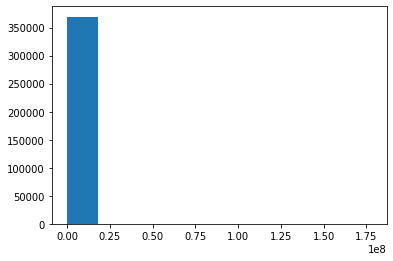

In [34]:
plt.hist(views, bins=10)
plt.show()

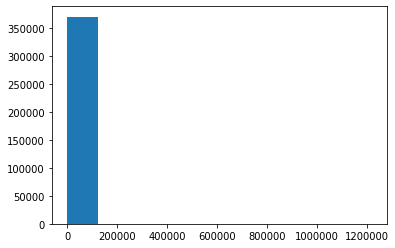

In [35]:
plt.hist(comments, bins=10)
plt.show()

#### Interpretation
- There are some outliers in both views column and comments column
- I am going to remove them using z-score method
- if z-score of val is > 3 than val is outlier

In [41]:
mean_v = np.mean(views)
std_v = np.std(views)
views_z = (views - mean_v)/std_v
df["views_z"] = views_z

In [39]:
mean_c = np.mean(comments)
std_c = np.std(comments)
comments_z = (comments - mean_c)/std_c
df["comments_z"] = comments_z

In [42]:
df

,Unnamed: 0,post_id,user_id,country,category,#views,#comments,#likes,comments_z,views_z
0,0,141569,13588,13,gaming,2403572.0,5606.000000,107865,0.302763,1.172867
1,1,278047,5601,13,gaming,1421234.0,7316.000000,68570,0.445920,0.567589
2,2,278280,31823,13,gaming,1460690.0,9924.000000,136786,0.664255,0.591900
3,3,161305,14424,13,gaming,1463710.0,1087.000000,62590,-0.075556,0.593761
4,4,340945,8532,13,gaming,2507066.0,2974.000000,21325,0.082419,1.236636
...,...,...,...,...,...,...,...,...,...,...
369915,10606,54629,3301,1,entertainment,2330730.0,4073.133333,34732,0.174435,1.127985
369916,10607,455654,28239,1,automotive,101291.0,0.000000,5397,-0.166557,-0.245708
369917,10608,339398,12540,1,animals,122548.0,5248.000000,6951,0.272792,-0.232611
369918,10609,283619,18768,1,howTo,232384.0,202.485714,11002,-0.149606,-0.164934


In [43]:
df1 = df[df["views_z"] < 3]

(366381, 10)


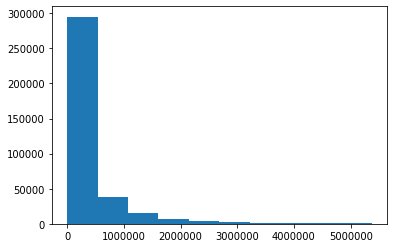

In [47]:
print(df1.shape)

plt.hist(df1["#views"].to_numpy(), bins=10)
plt.show()

In [48]:
df2 = df1[df1["comments_z"] < 3]

(365610, 10)


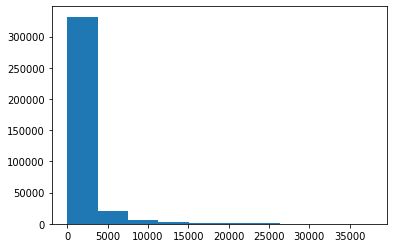

In [50]:
print(df2.shape)

plt.hist(df2["#comments"].to_numpy(), bins=10)
plt.show()

In [51]:
final_df = df2[["post_id", "user_id", "country", "category", "#views", "#comments", "#likes"]]

In [53]:
final_df.describe()

,post_id,user_id,country,#views,#comments,#likes
count,365610.000000,365610.000000,365610.000000,3.656100e+05,365610.000000,365610.000000
mean,264030.735921,21048.966899,6.697738,3.831308e+05,1517.369679,18531.081921
std,152591.477880,12092.552981,4.423148,6.284771e+05,3077.043851,36602.101071
min,0.000000,0.000000,0.000000,3.900000e+01,0.000000,1.000000
25%,131800.500000,10553.000000,3.000000,6.058325e+04,197.000000,2608.000000
50%,263954.000000,21210.000000,6.000000,1.539705e+05,549.000000,6865.000000
75%,396212.500000,31515.000000,11.000000,4.076370e+05,1461.000000,18560.000000
max,528460.000000,41773.000000,14.000000,5.368745e+06,37726.000000,990535.000000


In [54]:
final_df.to_csv("data/train_outlier_removal.csv")

# Data Normalization

### Normalizing Training Data

In [65]:
training_data = pd.read_csv("data/train_outlier_removal.csv")
training_data.reset_index(inplace = True)

In [69]:
views = training_data["#views"].to_numpy()
views_mean = np.mean(views)
views_std = np.std(views)

comments = training_data["#comments"].to_numpy()
comments_mean = np.mean(comments)
comments_std = np.std(comments)

likes = training_data["#likes"].to_numpy()
likes_mean = np.mean(likes)
likes_std = np.std(likes)

In [70]:
training_data["norm_views"] = (views - views_mean)/views_std
training_data["norm_comments"] = (comments - comments_mean)/comments_std
training_data["norm_likes"] = (likes - likes_mean)/likes_std

In [71]:
training_data

,index,Unnamed: 0,post_id,user_id,country,category,#views,#comments,#likes,norm_views,norm_comments,norm_likes
0,0,0,141569,13588,13,gaming,2403572.0,5606.000000,107865,3.214825,1.328755,2.440681
1,1,1,278047,5601,13,gaming,1421234.0,7316.000000,68570,1.651778,1.884483,1.367107
2,2,2,278280,31823,13,gaming,1460690.0,9924.000000,136786,1.714558,2.732051,3.230828
3,3,3,161305,14424,13,gaming,1463710.0,1087.000000,62590,1.719364,-0.139865,1.203728
4,4,4,340945,8532,13,gaming,2507066.0,2974.000000,21325,3.379500,0.473387,0.076332
...,...,...,...,...,...,...,...,...,...,...,...,...
365605,365605,369915,54629,3301,1,entertainment,2330730.0,4073.133333,34732,3.098923,0.830592,0.442623
365606,365606,369916,455654,28239,1,automotive,101291.0,0.000000,5397,-0.448449,-0.493126,-0.358835
365607,365607,369917,339398,12540,1,animals,122548.0,5248.000000,6951,-0.414626,1.212409,-0.316378
365608,365608,369918,283619,18768,1,howTo,232384.0,202.485714,11002,-0.239861,-0.427321,-0.205701


### Testing Data Normalisation

We are using the mean and standard deviation of training data to normalise testing data

In [72]:
testing_data = pd.read_csv("data/test_null_free.csv")

In [73]:
views_test = testing_data["#views"].to_numpy()
comments_test = testing_data["#comments"].to_numpy()

testing_data["norm_views"] = (views_test - views_mean)/views_std
testing_data["norm_comments"] = (comments_test - comments_mean)/comments_std

In [74]:
testing_data

,Unnamed: 0,post_id,user_id,country,category,#views,#comments,norm_views,norm_comments
0,0,54149,539,13,gaming,5162733.0,41547.000000,7.605065,13.009137
1,1,169258,24278,13,gaming,2645253.0,21437.000000,3.599376,6.473635
2,2,236048,32636,13,gaming,1037161.0,8775.000000,1.040660,2.358640
3,3,50631,20906,13,gaming,1061029.0,6544.000000,1.078638,1.633593
4,4,53051,526,13,gaming,526061.0,610.000000,0.227423,-0.294884
...,...,...,...,...,...,...,...,...,...
158536,4546,339911,11005,1,comedy,2110881.0,80.800000,2.749110,-0.466867
158537,4547,155630,8818,1,comedy,1545115.0,47.250000,1.848891,-0.477771
158538,4548,53041,17871,1,howTo,259282.0,865.625000,-0.197062,-0.211809
158539,4549,383854,18768,1,technology,83245.0,202.485714,-0.477163,-0.427321


# One-Hot encoding of Category and Country Columnns

In both Training and Testing Data

In [78]:
category_list = list(training_data.category.unique())

def get_category_val(cat):
    one_hot = np.zeros((len(category_list)), dtype = int)
    index = category_dict[cat]
    one_hot[index] = 1
    return one_hot

category_encoding = {}
for category in category_list:
    category_encoding[category] = get_category_val(category)

In [79]:
category_encoding

{'gaming': array([1, 0, 0, 0, 0, 0, 0, 0, 0]),
 'sports': array([0, 1, 0, 0, 0, 0, 0, 0, 0]),
 'entertainment': array([0, 0, 1, 0, 0, 0, 0, 0, 0]),
 'automotive': array([0, 0, 0, 1, 0, 0, 0, 0, 0]),
 'music': array([0, 0, 0, 0, 1, 0, 0, 0, 0]),
 'animals': array([0, 0, 0, 0, 0, 1, 0, 0, 0]),
 'comedy': array([0, 0, 0, 0, 0, 0, 1, 0, 0]),
 'howTo': array([0, 0, 0, 0, 0, 0, 0, 1, 0]),
 'technology': array([0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [80]:
country_list = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]

def get_country_enc(country):
    one_hot = np.zeros((len(country_list)), dtype = int)
    one_hot[int(country)] = 1
    return one_hot

country_encoding = {}
for country in country_list:
    country_encoding[country] = get_country_enc(country)

In [81]:
country_encoding

{0: array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 1: array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 2: array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 3: array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 4: array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 5: array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 6: array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 7: array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 8: array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 9: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]),
 10: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]),
 11: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]),
 12: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]),
 13: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]),
 14: array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])}

In [120]:
for i in range(training_data.shape[0]):
    
    category_val = category_encoding[training_data[["category"]].iloc[i].values[0]]
    training_data.at[i, "cat1"] = category_val[0]
    training_data.at[i, "cat2"] = category_val[1]
    training_data.at[i, "cat3"] = category_val[2]
    training_data.at[i, "cat4"] = category_val[3]
    training_data.at[i, "cat5"] = category_val[4]
    training_data.at[i, "cat6"] = category_val[5]
    training_data.at[i, "cat7"] = category_val[6]
    training_data.at[i, "cat8"] = category_val[7]
    training_data.at[i, "cat9"] = category_val[8]
    
    country_val = country_encoding[training_data[["country"]].iloc[i].values[0]]
    training_data.at[i, "count1"] = country_val[0]
    training_data.at[i, "count2"] = country_val[1]
    training_data.at[i, "count3"] = country_val[2]
    training_data.at[i, "count4"] = country_val[3]
    training_data.at[i, "count5"] = country_val[4]
    training_data.at[i, "count6"] = country_val[5]
    training_data.at[i, "count7"] = country_val[6]
    training_data.at[i, "count8"] = country_val[7]
    training_data.at[i, "count9"] = country_val[8]
    training_data.at[i, "count10"] = country_val[9]
    training_data.at[i, "count11"] = country_val[10]
    training_data.at[i, "count12"] = country_val[11]
    training_data.at[i, "count13"] = country_val[12]
    training_data.at[i, "count14"] = country_val[13]
    training_data.at[i, "count15"] = country_val[14]
    
#     if i%5000 == 0: print(i)

In [83]:
training_data.to_csv("data/train_data_normalise.csv")

In [84]:
training_data

,index,Unnamed: 0,post_id,user_id,country,category,#views,#comments,#likes,norm_views,...,count6,count7,count8,count9,count10,count11,count12,count13,count14,count15
0,0,0,141569,13588,13,gaming,2403572.0,5606.000000,107865,3.214825,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1,278047,5601,13,gaming,1421234.0,7316.000000,68570,1.651778,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,2,278280,31823,13,gaming,1460690.0,9924.000000,136786,1.714558,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,3,161305,14424,13,gaming,1463710.0,1087.000000,62590,1.719364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,4,340945,8532,13,gaming,2507066.0,2974.000000,21325,3.379500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365605,365605,369915,54629,3301,1,entertainment,2330730.0,4073.133333,34732,3.098923,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365606,365606,369916,455654,28239,1,automotive,101291.0,0.000000,5397,-0.448449,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365607,365607,369917,339398,12540,1,animals,122548.0,5248.000000,6951,-0.414626,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
365608,365608,369918,283619,18768,1,howTo,232384.0,202.485714,11002,-0.239861,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### One-hot encoding in Testing Data

In [119]:
for i in range(testing_data.shape[0]):
    
    category_val = category_encoding[testing_data[["category"]].iloc[i].values[0]]
    testing_data.at[i, "cat1"] = category_val[0]
    testing_data.at[i, "cat2"] = category_val[1]
    testing_data.at[i, "cat3"] = category_val[2]
    testing_data.at[i, "cat4"] = category_val[3]
    testing_data.at[i, "cat5"] = category_val[4]
    testing_data.at[i, "cat6"] = category_val[5]
    testing_data.at[i, "cat7"] = category_val[6]
    testing_data.at[i, "cat8"] = category_val[7]
    testing_data.at[i, "cat9"] = category_val[8]
    
    country_val = country_encoding[testing_data[["country"]].iloc[i].values[0]]
    testing_data.at[i, "count1"] = country_val[0]
    testing_data.at[i, "count2"] = country_val[1]
    testing_data.at[i, "count3"] = country_val[2]
    testing_data.at[i, "count4"] = country_val[3]
    testing_data.at[i, "count5"] = country_val[4]
    testing_data.at[i, "count6"] = country_val[5]
    testing_data.at[i, "count7"] = country_val[6]
    testing_data.at[i, "count8"] = country_val[7]
    testing_data.at[i, "count9"] = country_val[8]
    testing_data.at[i, "count10"] = country_val[9]
    testing_data.at[i, "count11"] = country_val[10]
    testing_data.at[i, "count12"] = country_val[11]
    testing_data.at[i, "count13"] = country_val[12]
    testing_data.at[i, "count14"] = country_val[13]
    testing_data.at[i, "count15"] = country_val[14]
    
#     if i%5000 == 0: print(i)

In [86]:
testing_data.to_csv("data/test_data_normalise.csv")

# Feature Engineering

- No of average views in each category
- No of average comments in each category
- No of average views in each conntry
- No of average views in each category
- No of views on a post
- No of comments on a post
- No of average views of the user
- No of average comments of the user

### Training Data - Features

In [87]:
training_data = pd.read_csv("data/train_data_normalise.csv")

In [88]:
category_avg_data = {}
for category in category_list:
    df = training_data[training_data['category'] == category]
    views = list(df['#views'].to_numpy())
    comments = list(df['#comments'].to_numpy())
    if len(views) > 0:
        avg_views = sum(views)/len(views)
    else:
        avg_views = 0
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    category_avg_data[category] = [avg_views, avg_comments]

country_avg_data = {}
for country in country_list:
    df = training_data[training_data['country'] == country]
    views = list(df['#views'].to_numpy())
    comments = list(df['#comments'].to_numpy())
    if len(views) > 0:
        avg_views = sum(views)/len(views)
    else:
        avg_views = 0
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    country_avg_data[country] = [avg_views, avg_comments]

In [89]:
user_list = list(training_data.user_id.unique())
user_avg_data = {}
for user in user_list:
    df = training_data[training_data['user_id'] == user]
    views = list(df['#views'].to_numpy())
    comments = list(df['#comments'].to_numpy())
    if len(views) > 0:
        avg_views = sum(views)/len(views)
    else:
        avg_views = 0
    if len(comments) > 0:
        avg_comments = sum(comments)/len(comments)
    else:
        avg_comments = 0
    user_avg_data[user] = [avg_views, avg_comments]

In [117]:
for i in range(training_data.shape[0]):
    training_data.at[i, 'user_avg_views'] = user_avg_data[training_data[["user_id"]].iloc[i].values[0]][0]
    training_data.at[i, 'user_avg_comments'] = user_avg_data[training_data[["user_id"]].iloc[i].values[0]][1]
    
    training_data.at[i, 'country_avg_views'] = country_avg_data[training_data[["country"]].iloc[i].values[0]][0]
    training_data.at[i, 'country_avg_comments'] = country_avg_data[training_data[["country"]].iloc[i].values[0]][1]
    
    training_data.at[i, 'category_avg_views'] = category_avg_data[training_data[["category"]].iloc[i].values[0]][0]
    training_data.at[i, 'category_avg_comments'] = category_avg_data[training_data[["category"]].iloc[i].values[0]][1]
    
#     if i%5000 == 0: print(i)

In [99]:
training_data = pd.read_csv("data/training_data_with_features.csv")

In [100]:
user_avg_views = training_data[["user_avg_views"]].to_numpy()
user_avg_comments = training_data[["user_avg_comments"]].to_numpy()

country_avg_views = training_data[["country_avg_views"]].to_numpy()
country_avg_comments = training_data[["country_avg_comments"]].to_numpy()

category_avg_views = training_data[["category_avg_views"]].to_numpy()
category_avg_comments = training_data[["category_avg_comments"]].to_numpy()

In [101]:
a1_mean, a1_std = np.mean(user_avg_views), np.std(user_avg_views)
a2_mean, a2_std = np.mean(user_avg_comments), np.std(user_avg_comments)
a3_mean, a3_std = np.mean(country_avg_views), np.std(country_avg_views)
a4_mean, a4_std = np.mean(country_avg_comments), np.std(country_avg_comments)
a5_mean, a5_std = np.mean(category_avg_views), np.std(category_avg_views)
a6_mean, a6_std = np.mean(category_avg_comments), np.std(category_avg_comments)

In [102]:
training_data["norm_user_views"] = (user_avg_views - a1_mean)/a1_std
training_data["norm_user_comments"] = (user_avg_comments - a2_mean)/a2_std
training_data["norm_country_views"] = (country_avg_views - a3_mean)/a3_std
training_data["norm_country_comments"] = (country_avg_comments - a4_mean)/a4_std
training_data["norm_category_views"] = (category_avg_views - a5_mean)/a5_std
training_data["norm_category_comments"] = (category_avg_comments - a6_mean)/a6_std

In [104]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365610 entries, 0 to 365609
Data columns (total 50 columns):
Unnamed: 0                365610 non-null int64
Unnamed: 0.1              365610 non-null int64
index                     365610 non-null int64
Unnamed: 0.1.1            365610 non-null int64
post_id                   365610 non-null int64
user_id                   365610 non-null int64
country                   365610 non-null int64
category                  365610 non-null object
#views                    365610 non-null float64
#comments                 365610 non-null float64
#likes                    365610 non-null int64
norm_views                365610 non-null float64
norm_comments             365610 non-null float64
norm_likes                365610 non-null float64
cat1                      365610 non-null float64
cat2                      365610 non-null float64
cat3                      365610 non-null float64
cat4                      365610 non-null float64
cat5  

In [105]:
training_data.to_csv("data/training_data_with_features.csv")

## Testing Data - Features

In [106]:
testing_data = pd.read_csv("data/test_data_normalise.csv")

In [107]:
testing_data.reset_index(inplace = True)

In [115]:
for i in range(testing_data.shape[0]):
    user_id = testing_data[["user_id"]].iloc[i].values[0]
    if user_id in user_avg_data:
        user_profile_data = user_avg_data[user_id]
    else:
        user_profile_data = [testing_data[["norm_views"]].iloc[i].values[0], testing_data[["norm_comments"]].iloc[i].values[0]]
        
    testing_data.at[i, 'user_avg_views'] = user_profile_data[0]
    testing_data.at[i, 'user_avg_comments'] = user_profile_data[1]
    
    testing_data.at[i, 'country_avg_views'] = country_avg_data[testing_data[["country"]].iloc[i].values[0]][0]
    testing_data.at[i, 'country_avg_comments'] = country_avg_data[testing_data[["country"]].iloc[i].values[0]][1]
    
    testing_data.at[i, 'category_avg_views'] = category_avg_data[testing_data[["category"]].iloc[i].values[0]][0]
    testing_data.at[i, 'category_avg_comments'] = category_avg_data[testing_data[["category"]].iloc[i].values[0]][1]
    
#     if i%5000 == 0: print(i)

In [109]:
testing_data.to_csv("data/testing_data_with_features.csv")

In [110]:
user_avg_views = testing_data[["user_avg_views"]].to_numpy()
user_avg_comments = testing_data[["user_avg_comments"]].to_numpy()

country_avg_views = testing_data[["country_avg_views"]].to_numpy()
country_avg_comments = testing_data[["country_avg_comments"]].to_numpy()

category_avg_views = testing_data[["category_avg_views"]].to_numpy()
category_avg_comments = testing_data[["category_avg_comments"]].to_numpy()

In [111]:
testing_data["norm_user_views"] = (user_avg_views - a1_mean)/a1_std
testing_data["norm_user_comments"] = (user_avg_comments - a2_mean)/a2_std
testing_data["norm_country_views"] = (country_avg_views - a3_mean)/a3_std
testing_data["norm_country_comments"] = (country_avg_comments - a4_mean)/a4_std
testing_data["norm_category_views"] = (category_avg_views - a5_mean)/a5_std
testing_data["norm_category_comments"] = (category_avg_comments - a6_mean)/a6_std

In [113]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158541 entries, 0 to 158540
Data columns (total 47 columns):
index                     158541 non-null int64
Unnamed: 0                158541 non-null int64
Unnamed: 0.1              158541 non-null int64
post_id                   158541 non-null int64
user_id                   158541 non-null int64
country                   158541 non-null int64
category                  158541 non-null object
#views                    158541 non-null float64
#comments                 158541 non-null float64
norm_views                158541 non-null float64
norm_comments             158541 non-null float64
cat1                      158541 non-null float64
cat2                      158541 non-null float64
cat3                      158541 non-null float64
cat4                      158541 non-null float64
cat5                      158541 non-null float64
cat6                      158541 non-null float64
cat7                      158541 non-null float64
ca

In [114]:
testing_data.to_csv("data/testing_data_with_features.csv")

## Features Description

<b>#1 : norm_views</b>
<br> 
min-max normalization of #views
<br> 
<b>#2 : norm_comments</b>
<br> min-max normalisation of #comments
<br> 
<b>#3 : norm_user_views</b>
<br> Using the concept of user profiling, these are avg #views which a user got
<br> 
<b>#4 : norm_user_comments</b>
<br> Using the concept of user profiling, these are avg #comments which a user got
<br> 
<b>#5 : norm_country_views</b>
<br> Using the concept of country profiling, these are avg #views which are seen by users of a country
<br> 
<b>#6 : norm_country_comments</b>
<br> Using the concept of country profiling, these are avg #comments which are given by users of a country
<br> 
<b>#7 : norm_category_views</b>
<br> Using the concept of category profiling, these are avg #views which are seen by users of a particular category
<br> 
<b>#8 : norm_category_comments</b>
<br> Using the concept of category profiling, these are avg #comments which are given by users of a particular category
<br> 
<b>#9 - #17 : Cat1 - Cat9</b>
<br> One-hot encoding of category
<br> 
<b>#18 - #32 : Count1 - Count15</b>
<br> One-hot encoding of a country